In [20]:
import pandas
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier

data = pandas.read_csv('drug200.csv')
data_sel = data.loc[:, data.columns.isin(['Drug', 'Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])]
data_sel = data_sel.dropna()

#Обработаем столбец Sex. 0 - женщина, 1 - мужчина
data_sel['Sex'] = np.where(data_sel['Sex'] == 'F', 0, 1)

#Обработаем столбец BP. 0 - нормальный, 1 - высокий, 2 - низкий
data_sel['BP'] = np.where(data_sel['BP'] == 'LOW', 2, data_sel['BP'])
data_sel['BP'] = np.where(data_sel['BP'] == 'NORMAL', 0, data_sel['BP'])
data_sel['BP'] = np.where(data_sel['BP'] == 'HIGH', 1, data_sel['BP'])

#Обработаем столбец Cholesterol. 0 - нормальный, 1 - высокий
data_sel['Cholesterol'] = np.where(data_sel['Cholesterol'] == 'NORMAL', 0, 1)

#Обработаем столбец Drug. DrugA – класс 0, остальные уровни – класс 1
data_sel['Drug'] = np.where(data_sel['Drug'] == 'drugX', 0, 1)

Drug = data_sel.loc[:, data_sel.columns.isin(['Drug'])]

X = data_sel.loc[:, data_sel.columns.isin(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])]

#Выводим изменённую таблицу
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,1,1,25.355
1,47,1,2,1,13.093
2,47,1,2,1,10.114
3,28,0,0,1,7.798
4,61,0,2,1,18.043
...,...,...,...,...,...
195,56,0,2,1,11.567
196,16,1,2,1,12.006
197,52,1,0,1,9.894
198,23,1,0,0,14.020


D:\Programs\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

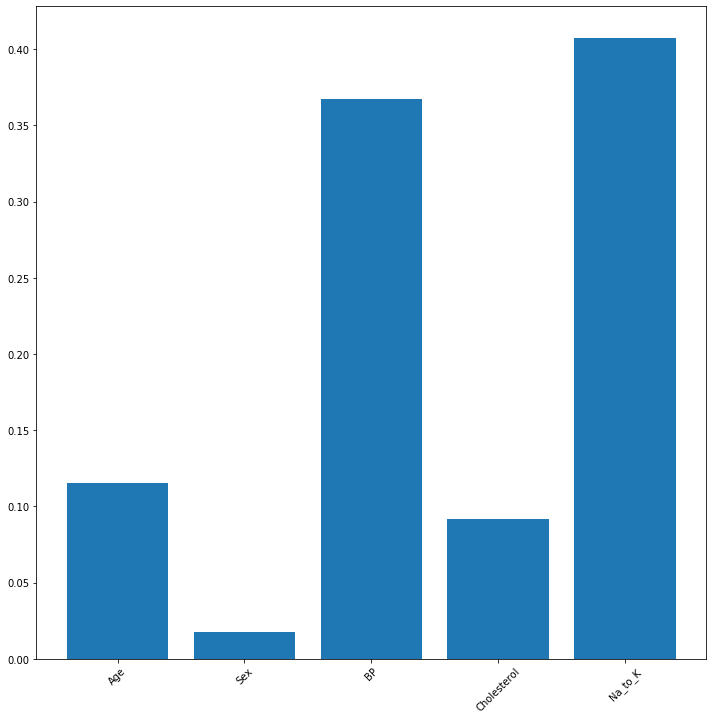

In [24]:
#Оценка важности признаков
continuous_features = set(X.columns)
scaler = MinMaxScaler()
df_norm = X.copy()
df_norm[list(continuous_features)] = scaler.fit_transform(X[list(continuous_features)])

clf = RandomForestClassifier()
clf.fit(df_norm, Drug)
# create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(12,12))
plt.bar(df_norm.columns, clf.feature_importances_)
plt.xticks(rotation=45)

In [21]:
#Делим данные на обучающую и тестовую выборку
x_train, x_validation, y_train, y_validation = train_test_split(X, Drug, test_size=.33, random_state=5)

In [8]:

logistic = LogisticRegression(solver='lbfgs')

logistic.fit(x_train, y_train.values.ravel())

logistic_pred = logistic.predict(x_validation)

print("Logistic Regression Test Accuracy: " + str(logistic.score(x_validation, y_validation)*100) + "%")
print('Report for Logistic Regression: ')
print(classification_report(y_validation, logistic_pred))

Logistic Regression Test Accuracy: 84.84848484848484%
Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       0.88      0.92      0.90        50

    accuracy                           0.85        66
   macro avg       0.80      0.77      0.78        66
weighted avg       0.84      0.85      0.84        66



In [13]:
#Cтроим классификатор Случайный Лес(Random Forest)

#Найдеч лучшее количество деревьев с шагом 100
accuracy_ = []
precision_ = []
recall_ = []
F1_ = []

for i in range(200, 400, 100):
    param_grid = { 'n_estimators': [i],'max_features': ['auto'],'max_depth' : list(range(1, 20)), 'criterion' :['gini']}
    RFC = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, refit = True) 
    RFC.fit(x_train, y_train.values.ravel())
    accuracy_.append(np.average(cross_val_score(RFC.best_estimator_, x_validation, y_validation, scoring='accuracy')))
    precision_.append(np.average(cross_val_score(RFC.best_estimator_, x_validation, y_validation, scoring='precision')))
    recall_.append(np.average(cross_val_score(RFC.best_estimator_, x_validation, y_validation, scoring='recall')))
    F1_.append(np.average(cross_val_score(RFC.best_estimator_, x_validation, y_validation, scoring='f1')))
    
print(accuracy_, "\n", precision_, "\n", recall_, "\n", F1_)


D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

[0.924838446577577, 0.924838446577577, 0.9399899617290922] 
 [0.9256965944272446, 0.926785919045981, 0.926785919045981] 
 [0.9607843137254902, 1.0, 1.0] 
 [0.9518037518037518, 0.9618566618566619, 0.9618566618566619]


D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


'#Оцениваем точность классификатора Случайный Лес с помощью метрик accuracy, precision, recall и F1\nprint("accuracy:"+str(np.average(cross_val_score(RFC.best_estimator_, x_validation, y_validation, scoring=\'accuracy\'))))\nprint("precision:"+str(np.average(cross_val_score(RFC.best_estimator_, x_validation, y_validation, scoring=\'precision\'))))\nprint("recall:"+str(np.average(cross_val_score(RFC.best_estimator_, x_validation, y_validation, scoring=\'recall\'))))\nprint("f1:"+str(np.average(cross_val_score(RFC.best_estimator_, x_validation, y_validation, scoring=\'f1\'))))'

In [19]:
#Как видно из списков метрик 400 деревьев оптимальный вариант, походим вокруг него с шагом 10

accuracy_ = []
precision_ = []
recall_ = []
F1_ = []

for i in range(350, 460, 10):
    param_grid = { 'n_estimators': [i],'max_features': ['auto'],'max_depth' : list(range(1, 20)), 'criterion' :['gini']}
    RFC = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, refit = True) 
    RFC.fit(x_train, y_train.values.ravel())
    accuracy_.append(np.average(cross_val_score(RFC.best_estimator_, x_validation, y_validation, scoring='accuracy')))
    precision_.append(np.average(cross_val_score(RFC.best_estimator_, x_validation, y_validation, scoring='precision')))
    recall_.append(np.average(cross_val_score(RFC.best_estimator_, x_validation, y_validation, scoring='recall')))
    F1_.append(np.average(cross_val_score(RFC.best_estimator_, x_validation, y_validation, scoring='f1')))
    
print(accuracy_, "\n", precision_, "\n", recall_, "\n", F1_)

D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

[0.924838446577577, 0.9399899617290922, 0.9399899617290922, 0.924838446577577, 0.9399899617290922, 0.9399899617290922, 0.9103456929543885, 0.924838446577577, 0.9399899617290922, 0.9399899617290922, 0.9399899617290922] 
 [0.926785919045981, 0.9256965944272446, 0.926785919045981, 0.926785919045981, 0.926785919045981, 0.9248366013071895, 0.9248366013071895, 0.926785919045981, 0.9256965944272446, 0.926785919045981, 0.926785919045981] 
 [0.9803921568627452, 0.9803921568627452, 0.9803921568627452, 1.0, 1.0, 1.0, 1.0, 0.9803921568627452, 1.0, 1.0, 1.0] 
 [0.9517726282432165, 0.9618566618566619, 0.9618566618566619, 0.9618566618566619, 0.9618566618566619, 0.9517726282432165, 0.9618566618566619, 0.9618566618566619, 0.9618566618566619, 0.9517726282432165, 0.9618566618566619]


D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [24]:
m_acc = max(accuracy_)
m_prec = max(precision_)
m_recall = max(recall_)
m_f1 = max(F1_)

for i, j in zip([accuracy_, precision_, recall_, F1_], [m_acc, m_prec, m_recall, m_f1]):
    print([k for k, l in enumerate(i) if l == j])



[1, 2, 4, 5, 8, 9, 10]
[0, 2, 3, 4, 7, 9, 10]
[3, 4, 5, 6, 8, 9, 10]
[1, 2, 3, 4, 6, 7, 8, 10]


In [26]:
#Видно, что в 4 и 10 случаях, а именно при 390 и 450 деревьях, получаем максимальные значения метрик, возьмем меньшее из них
#Лучшие результаты достигаются при количестве 390, его и оставим


In [ ]:
#Сравним метрики обоих классификаторов

#Логистическая регрессия
accuracy: 0.85
f1: 0.84
precision: 0.84
recall: 0.85
    
#Случайный лес
accuracy: 0.9399899617290922
f1: 0.9517726282432165
precision: 0.926785919045981
recall: 1.0
    
#Метрики f1 и recall лучше у Случайного Леса, значит он показывает себя лучше на этих данных, чем Логистическая регрессия